# Data Visualization using Python
### A. Matplotlib.pyplot - For more details refer my blog [here](https://www.vaishalilambe.com)
#### 1. Line Plot
 - It is best to use a line plot when comparing fewer than 25 numbers. It is a quick, simple way to organize data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

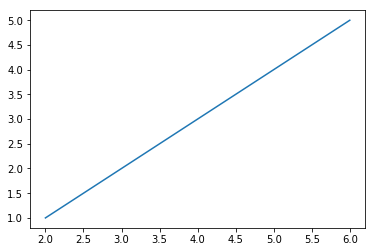

In [2]:
x = [2, 4, 6]
y = [1, 3, 5]
plt.plot(x, y)
plt.show()

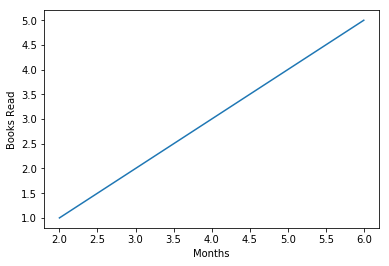

In [3]:
## provide labels for x and y axis
plt.xlabel('Months')
plt.ylabel('Books Read')
plt.plot(x, y)
plt.show()

- matplotlib.axes.Axes.plot
- matplotlib.pyplot.plot
- matplotlib.pyplot.subplots
- matplotlib.figure.Figure.savefig

The .savefig() method requires a filename be specified as the first argument. This filename can be a full path and as seen above, can also include a particular file extension if desired. If no extension is provided, the configuration value of savefig.format is used instead.

ADDITIONAL SAVEFIG OPTIONS

In addition to the basic functionality of saving the chart to a file, .savefig() also has a number of useful optional arguments.

- dpi can be used to set the resolution of the file to a numeric value.
- transparent can be set to True, which causes the background of the chart to be transparent.
- bbox_inches can be set to alter the size of the bounding box (whitespace) around the output image. In most cases, if no bounding box is desired, using bbox_inches='tight' is ideal.
- If bbox_inches is set to 'tight', then the pad_inches option specifies the amount of padding around the image.

There are a handful of additional options for specific occasions, but overall this should get you started with easily generating image file outputs from your matplotlib charts.

In [4]:
plt.savefig('lineplot_1.png')

<Figure size 432x288 with 0 Axes>

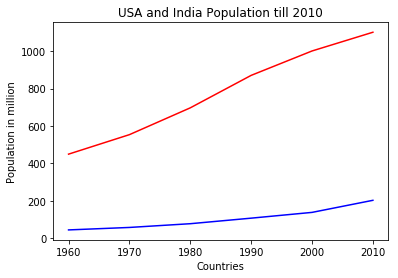

In [5]:
year = [1960, 1970, 1980, 1990, 2000, 2010]
usa = [44.91, 58.09, 78.07, 107.7, 138.5, 203]
india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1100.4]

#provide line colors 
plt.plot(year, usa, color='b')
plt.plot(year, india, color='red')
plt.xlabel('Countries')
plt.ylabel('Population in million')

#provide title 
plt.title('USA and India Population till 2010')
plt.show()

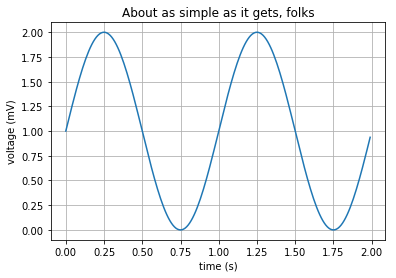

In [6]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

#### 2. Multiple subplots

##### Call signature:
subplot(nrows, ncols, index, **kwargs)
- In the current figure, create and return an Axes, at position index of a (virtual) grid of nrows by ncols axes. Indexes go from 1 to nrows * ncols, incrementing in row-major order.

- If nrows, ncols and index are all less than 10, they can also be given as a single, concatenated, three-digit number.

##### Keyword arguments:

- facecolor: The background color of the subplot, which can be any valid color specifier. See matplotlib.colors for more information.
polar:
- A boolean flag indicating whether the subplot plot should be a polar projection. Defaults to False.
projection:
A string giving the name of a custom projection to be used for the subplot. This projection must have been previously registered. See matplotlib.projections.

##### pyplot Two subplots

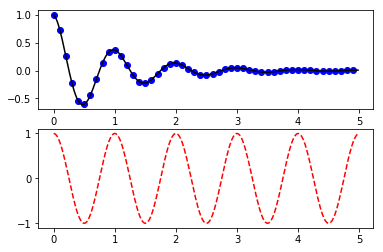

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

##### pyplot scales

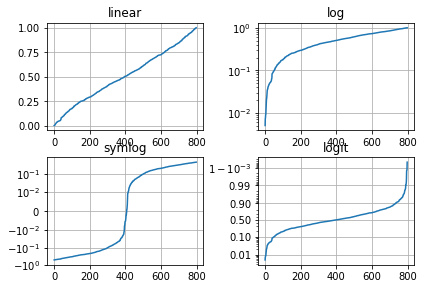

In [8]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

##### Multiple figs demo

In [9]:
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

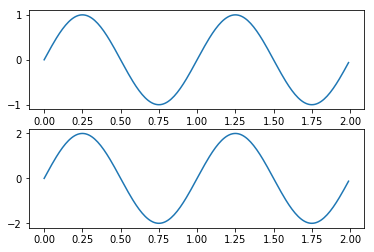

In [10]:
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)

##### Mupltiple subplots

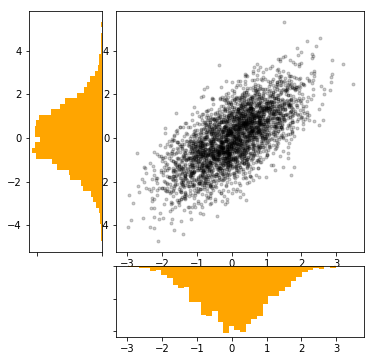

In [11]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='orange')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='orange')
y_hist.invert_xaxis()


"Colormap" Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

##### Subplots Adjust

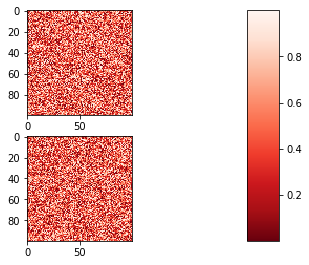

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.Reds_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.Reds_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

##### Geographic Projections

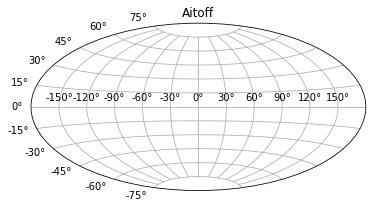

In [13]:
plt.figure()
plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.grid(True)

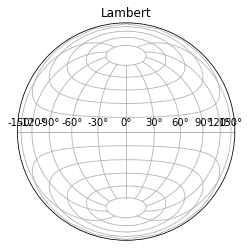

In [14]:
plt.figure()
plt.subplot(111, projection="lambert")
plt.title("Lambert")
plt.grid(True)

##### Shared Axis Demo

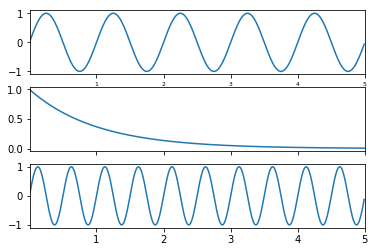

In [15]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

##### Zooming in and out using Axes.margins

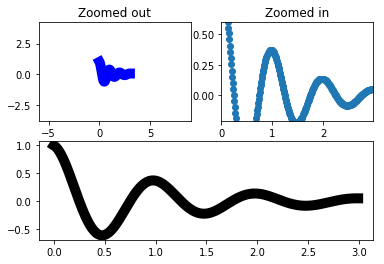

In [71]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1), 'k')

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1), 'b')
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1), 'o')
ax3.set_title('Zoomed in')

plt.show()

##### Figure Title

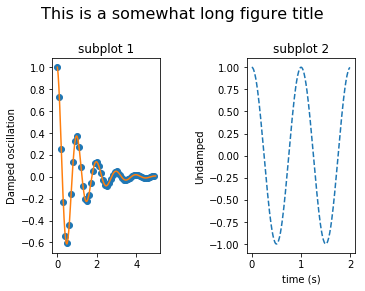

In [17]:
from matplotlib.font_manager import FontProperties
def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)


plt.subplot(121)
plt.plot(t1, f(t1), 'o', t2, f(t2), '-')
plt.title('subplot 1')
plt.ylabel('Damped oscillation')
plt.suptitle('This is a somewhat long figure title', fontsize=16)


plt.subplot(122)
plt.plot(t3, np.cos(2*np.pi*t3), '--')
plt.xlabel('time (s)')
plt.title('subplot 2')
plt.ylabel('Undamped')

plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

plt.show()


##### Scatter Star Poly

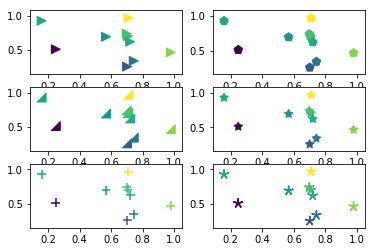

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=(verts, 0))
# equivalent:
# plt.scatter(x, y, s=80, c=z, marker=None, verts=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()

##### Contour Image

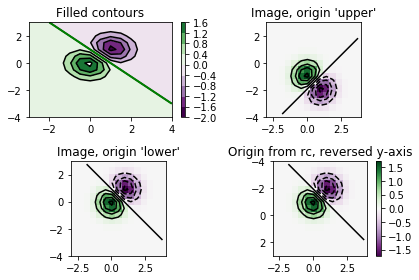

In [19]:
from matplotlib import cm

# Default delta is large because that makes it fast, and it illustrates
# the correct registration between image and contours.
delta = 0.5

extent = (-3, 4, -4, 3)

x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 1.601, 0.4)

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn

fig = plt.figure()
fig.subplots_adjust(hspace=0.3)


plt.subplot(2, 2, 1)

cset1 = plt.contourf(X, Y, Z, levels,
                     cmap=cm.get_cmap(cmap, len(levels) - 1), norm=norm)
# It is not necessary, but for the colormap, we need only the
# number of levels minus 1.  To avoid discretization error, use
# either this number or a large number such as the default (256).

# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.

cset2 = plt.contour(X, Y, Z, cset1.levels, colors='k')

# We don't really need dashed contour lines to indicate negative
# regions, so let's turn them off.

for c in cset2.collections:
    c.set_linestyle('solid')

# It is easier here to make a separate call to contour than
# to set up an array of colors and linewidths.
# We are making a thick green line as a zero contour.
# Specify the zero level as a tuple with only 0 in it.

cset3 = plt.contour(X, Y, Z, (0,), colors='g', linewidths=2)
plt.title('Filled contours')
plt.colorbar(cset1)


plt.subplot(2, 2, 2)

plt.imshow(Z, extent=extent, cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='upper', extent=extent)
plt.axis(v)
plt.title("Image, origin 'upper'")

plt.subplot(2, 2, 3)

plt.imshow(Z, origin='lower', extent=extent, cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='lower', extent=extent)
plt.axis(v)
plt.title("Image, origin 'lower'")

plt.subplot(2, 2, 4)

# We will use the interpolation "nearest" here to show the actual
# image pixels.
# Note that the contour lines don't extend to the edge of the box.
# This is intentional. The Z values are defined at the center of each
# image pixel (each color block on the following subplot), so the
# domain that is contoured does not extend beyond these pixel centers.
im = plt.imshow(Z, interpolation='nearest', extent=extent,
                cmap=cmap, norm=norm)
v = plt.axis()
plt.contour(Z, levels, colors='k', origin='image', extent=extent)
plt.axis(v)
ylim = plt.get(plt.gca(), 'ylim')
plt.setp(plt.gca(), ylim=ylim[::-1])
plt.title("Origin from rc, reversed y-axis")
plt.colorbar(im)

plt.tight_layout()
plt.show()

##### Pie chart on polar axis

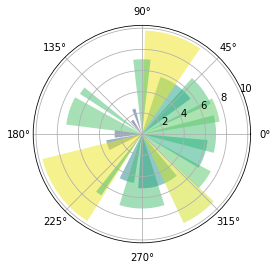

In [20]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

##### Pie demo

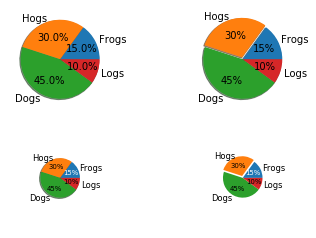

In [69]:
from matplotlib.gridspec import GridSpec
# Some data

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# Make square figures and axes

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('w')

plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('w')

plt.show()

##### Zorder Demo

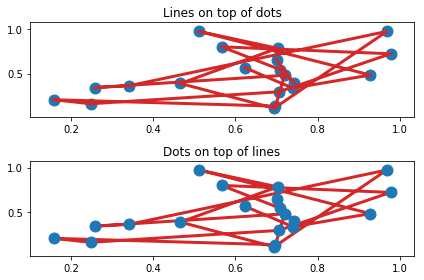

In [22]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.random.random(20)
y = np.random.random(20)

plt.figure()
plt.subplot(211)
plt.plot(x, y, 'C3', lw=3)
plt.scatter(x, y, s=120)
plt.title('Lines on top of dots')

# Scatter plot on top of lines
plt.subplot(212)
plt.plot(x, y, 'C3', zorder=1, lw=3)
plt.scatter(x, y, s=120, zorder=2)
plt.title('Dots on top of lines')
plt.tight_layout()

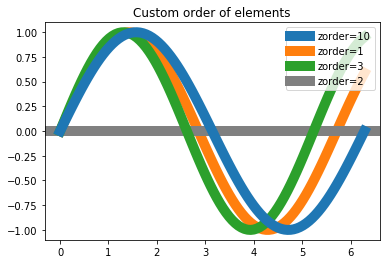

In [23]:
x = np.linspace(0, 2*np.pi, 100)
plt.rcParams['lines.linewidth'] = 10
plt.figure()
plt.plot(x, np.sin(x), label='zorder=10', zorder=10)  # on top
plt.plot(x, np.sin(1.1*x), label='zorder=1', zorder=1)  # bottom
plt.plot(x, np.sin(1.2*x), label='zorder=3',  zorder=3)
plt.axhline(0, label='zorder=2', color='grey', zorder=2)
plt.title('Custom order of elements')
l = plt.legend(loc='upper right')
l.set_zorder(20)  # put the legend on top
plt.show()

##### Patheffect Demo

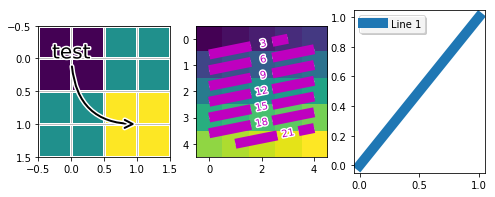

In [66]:
import matplotlib.patheffects as PathEffects
import numpy as np

if 1:
    plt.figure(1, figsize=(8, 3))
    ax1 = plt.subplot(131)
    ax1.imshow([[1, 2], [2, 3]])
    txt = ax1.annotate("test", (1., 1.), (0., 0),
                       arrowprops=dict(arrowstyle="->",
                                       connectionstyle="angle3", lw=2),
                       size=20, ha="center",
                       path_effects=[PathEffects.withStroke(linewidth=3,
                                                            foreground="w")])
    txt.arrow_patch.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="w"),
        PathEffects.Normal()])

    pe = [PathEffects.withStroke(linewidth=3,
                                 foreground="w")]
    ax1.grid(True, linestyle="-", path_effects=pe)

    ax2 = plt.subplot(132)
    arr = np.arange(25).reshape((5, 5))
    ax2.imshow(arr)
    cntr = ax2.contour(arr, colors="m")

    plt.setp(cntr.collections, path_effects=[
        PathEffects.withStroke(linewidth=3, foreground="w")])

    clbls = ax2.clabel(cntr, fmt="%2.0f", use_clabeltext=True)
    plt.setp(clbls, path_effects=[
        PathEffects.withStroke(linewidth=3, foreground="w")])

    # shadow as a path effect
    ax3 = plt.subplot(133)
    p1, = ax3.plot([0, 1], [0, 1])
    leg = ax3.legend([p1], ["Line 1"], fancybox=True, loc=2)
    leg.legendPatch.set_path_effects([PathEffects.withSimplePatchShadow()])

    plt.show()

##### Aggregate Filter

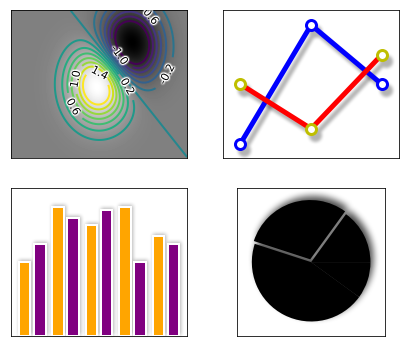

In [65]:
import matplotlib.transforms as mtransforms
from matplotlib.colors import LightSource
from matplotlib.artist import Artist


def smooth1d(x, window_len):
    # copied from http://www.scipy.org/Cookbook/SignalSmooth

    s = np.r_[2*x[0] - x[window_len:1:-1], x, 2*x[-1] - x[-1:-window_len:-1]]
    w = np.hanning(window_len)
    y = np.convolve(w/w.sum(), s, mode='same')
    return y[window_len-1:-window_len+1]


def smooth2d(A, sigma=3):

    window_len = max(int(sigma), 3)*2 + 1
    A1 = np.array([smooth1d(x, window_len) for x in np.asarray(A)])
    A2 = np.transpose(A1)
    A3 = np.array([smooth1d(x, window_len) for x in A2])
    A4 = np.transpose(A3)

    return A4


class BaseFilter(object):
    def prepare_image(self, src_image, dpi, pad):
        ny, nx, depth = src_image.shape
        # tgt_image = np.zeros([pad*2+ny, pad*2+nx, depth], dtype="d")
        padded_src = np.zeros([pad*2 + ny, pad*2 + nx, depth], dtype="d")
        padded_src[pad:-pad, pad:-pad, :] = src_image[:, :, :]

        return padded_src  # , tgt_image

    def get_pad(self, dpi):
        return 0

    def __call__(self, im, dpi):
        pad = self.get_pad(dpi)
        padded_src = self.prepare_image(im, dpi, pad)
        tgt_image = self.process_image(padded_src, dpi)
        return tgt_image, -pad, -pad


class OffsetFilter(BaseFilter):
    def __init__(self, offsets=None):
        if offsets is None:
            self.offsets = (0, 0)
        else:
            self.offsets = offsets

    def get_pad(self, dpi):
        return int(max(*self.offsets)/72.*dpi)

    def process_image(self, padded_src, dpi):
        ox, oy = self.offsets
        a1 = np.roll(padded_src, int(ox/72.*dpi), axis=1)
        a2 = np.roll(a1, -int(oy/72.*dpi), axis=0)
        return a2


class GaussianFilter(BaseFilter):
    "simple gauss filter"

    def __init__(self, sigma, alpha=0.5, color=None):
        self.sigma = sigma
        self.alpha = alpha
        if color is None:
            self.color = (0, 0, 0)
        else:
            self.color = color

    def get_pad(self, dpi):
        return int(self.sigma*3/72.*dpi)

    def process_image(self, padded_src, dpi):
        # offsetx, offsety = int(self.offsets[0]), int(self.offsets[1])
        tgt_image = np.zeros_like(padded_src)
        aa = smooth2d(padded_src[:, :, -1]*self.alpha,
                      self.sigma/72.*dpi)
        tgt_image[:, :, -1] = aa
        tgt_image[:, :, :-1] = self.color
        return tgt_image


class DropShadowFilter(BaseFilter):
    def __init__(self, sigma, alpha=0.3, color=None, offsets=None):
        self.gauss_filter = GaussianFilter(sigma, alpha, color)
        self.offset_filter = OffsetFilter(offsets)

    def get_pad(self, dpi):
        return max(self.gauss_filter.get_pad(dpi),
                   self.offset_filter.get_pad(dpi))

    def process_image(self, padded_src, dpi):
        t1 = self.gauss_filter.process_image(padded_src, dpi)
        t2 = self.offset_filter.process_image(t1, dpi)
        return t2


class LightFilter(BaseFilter):
    "simple gauss filter"

    def __init__(self, sigma, fraction=0.5):
        self.gauss_filter = GaussianFilter(sigma, alpha=1)
        self.light_source = LightSource()
        self.fraction = fraction

    def get_pad(self, dpi):
        return self.gauss_filter.get_pad(dpi)

    def process_image(self, padded_src, dpi):
        t1 = self.gauss_filter.process_image(padded_src, dpi)
        elevation = t1[:, :, 3]
        rgb = padded_src[:, :, :3]

        rgb2 = self.light_source.shade_rgb(rgb, elevation,
                                           fraction=self.fraction)

        tgt = np.empty_like(padded_src)
        tgt[:, :, :3] = rgb2
        tgt[:, :, 3] = padded_src[:, :, 3]

        return tgt


class GrowFilter(BaseFilter):
    "enlarge the area"

    def __init__(self, pixels, color=None):
        self.pixels = pixels
        if color is None:
            self.color = (1, 1, 1)
        else:
            self.color = color

    def __call__(self, im, dpi):
        pad = self.pixels
        ny, nx, depth = im.shape
        new_im = np.empty([pad*2 + ny, pad*2 + nx, depth], dtype="d")
        alpha = new_im[:, :, 3]
        alpha.fill(0)
        alpha[pad:-pad, pad:-pad] = im[:, :, -1]
        alpha2 = np.clip(smooth2d(alpha, self.pixels/72.*dpi) * 5, 0, 1)
        new_im[:, :, -1] = alpha2
        new_im[:, :, :-1] = self.color
        offsetx, offsety = -pad, -pad

        return new_im, offsetx, offsety


class FilteredArtistList(Artist):
    """
    A simple container to draw filtered artist.
    """

    def __init__(self, artist_list, filter):
        self._artist_list = artist_list
        self._filter = filter
        Artist.__init__(self)

    def draw(self, renderer):
        renderer.start_rasterizing()
        renderer.start_filter()
        for a in self._artist_list:
            a.draw(renderer)
        renderer.stop_filter(self._filter)
        renderer.stop_rasterizing()


def filtered_text(ax):
    # mostly copied from contour_demo.py

    # prepare image
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2) * 2

    # draw
    im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                   cmap=cm.gray, extent=(-3, 3, -2, 2))
    levels = np.arange(-1.2, 1.6, 0.2)
    CS = ax.contour(Z, levels,
                    origin='lower',
                    linewidths=2,
                    extent=(-3, 3, -2, 2))

    ax.set_aspect("auto")

    # contour label
    cl = ax.clabel(CS, levels[1::2],  # label every second level
                   inline=1,
                   fmt='%1.1f',
                   fontsize=11)

    # change clable color to black
    from matplotlib.patheffects import Normal
    for t in cl:
        t.set_color("k")
        # to force TextPath (i.e., same font in all backends)
        t.set_path_effects([Normal()])

    # Add white glows to improve visibility of labels.
    white_glows = FilteredArtistList(cl, GrowFilter(3))
    ax.add_artist(white_glows)
    white_glows.set_zorder(cl[0].get_zorder() - 0.1)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


def drop_shadow_line(ax):
    # copied from examples/misc/svg_filter_line.py

    # draw lines
    l1, = ax.plot([0.1, 0.5, 0.9], [0.1, 0.9, 0.5], "bo-",
                  mec="b", mfc="w", lw=5, mew=3, ms=10, label="Line 1")
    l2, = ax.plot([0.1, 0.5, 0.9], [0.5, 0.2, 0.7], "ro-",
                  mec="y", mfc="w", lw=5, mew=3, ms=10, label="Line 1")

    gauss = DropShadowFilter(4)

    for l in [l1, l2]:

        # draw shadows with same lines with slight offset.

        xx = l.get_xdata()
        yy = l.get_ydata()
        shadow, = ax.plot(xx, yy)
        shadow.update_from(l)

        # offset transform
        ot = mtransforms.offset_copy(l.get_transform(), ax.figure,
                                     x=4.0, y=-6.0, units='points')

        shadow.set_transform(ot)

        # adjust zorder of the shadow lines so that it is drawn below the
        # original lines
        shadow.set_zorder(l.get_zorder() - 0.5)
        shadow.set_agg_filter(gauss)
        shadow.set_rasterized(True)  # to support mixed-mode renderers

    ax.set_xlim(0., 1.)
    ax.set_ylim(0., 1.)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


def drop_shadow_patches(ax):
    # Copied from barchart_demo.py
    N = 5
    menMeans = (20, 35, 30, 35, 27)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    rects1 = ax.bar(ind, menMeans, width, color='orange', ec="w", lw=2)

    womenMeans = (25, 32, 34, 20, 25)
    rects2 = ax.bar(ind + width + 0.1, womenMeans, width,
                    color='purple', ec="w", lw=2)

    # gauss = GaussianFilter(1.5, offsets=(1,1), )
    gauss = DropShadowFilter(5, offsets=(1, 1), )
    shadow = FilteredArtistList(rects1 + rects2, gauss)
    ax.add_artist(shadow)
    shadow.set_zorder(rects1[0].get_zorder() - 0.1)

    ax.set_ylim(0, 40)

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


def light_filter_pie(ax):
    fracs = [15, 30, 45, 10]
    explode = (0, 0.05, 0, 0)
    pies = ax.pie(fracs, explode=explode)
    ax.patch.set_visible(True)

    light_filter = LightFilter(9)
    for p in pies[0]:
        p.set_agg_filter(light_filter)
        p.set_rasterized(True)  # to support mixed-mode renderers
        p.set(ec="none",
              lw=2)

    gauss = DropShadowFilter(9, offsets=(3, 4), alpha=0.7)
    shadow = FilteredArtistList(pies[0], gauss)
    ax.add_artist(shadow)
    shadow.set_zorder(pies[0][0].get_zorder() - 0.1)


if 1:

    plt.figure(1, figsize=(6, 6))
    plt.subplots_adjust(left=0.05, right=0.95)

    ax = plt.subplot(221)
    filtered_text(ax)

    ax = plt.subplot(222)
    drop_shadow_line(ax)

    ax = plt.subplot(223)
    drop_shadow_patches(ax)

    ax = plt.subplot(224)
    ax.set_aspect(1)
    light_filter_pie(ax)
    ax.set_frame_on(True)

    plt.show()

##### Anscombe’s Quartet

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


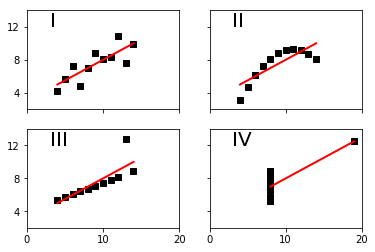

In [26]:
from __future__ import print_function
"""
Edward Tufte uses this example from Anscombe to show 4 datasets of x
and y that have the same mean, standard deviation, and regression
line, but which are qualitatively different.

matplotlib fun for a rainy day
"""

import matplotlib.pyplot as plt
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


def fit(x):
    return 3 + 0.5 * x


xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

##### Triinterp

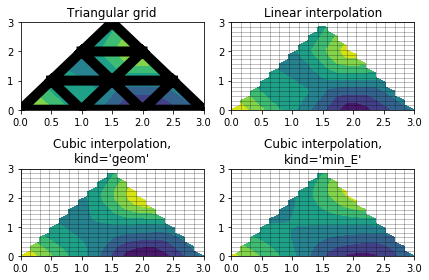

In [27]:
import matplotlib.tri as mtri

# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5, 1.5, 2.5, 1, 2, 1.5])
y = np.asarray([0, 0, 0, 0, 1.0, 1.0, 1.0, 2, 2, 3.0])
triangles = [[0, 1, 4], [1, 2, 5], [2, 3, 6], [1, 5, 4], [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7], [7, 8, 9]]
triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = np.cos(1.5 * x) * np.cos(1.5 * y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

interp_lin = mtri.LinearTriInterpolator(triang, z)
zi_lin = interp_lin(xi, yi)

interp_cubic_geom = mtri.CubicTriInterpolator(triang, z, kind='geom')
zi_cubic_geom = interp_cubic_geom(xi, yi)

interp_cubic_min_E = mtri.CubicTriInterpolator(triang, z, kind='min_E')
zi_cubic_min_E = interp_cubic_min_E(xi, yi)


# Plot the triangulation.
plt.subplot(221)
plt.tricontourf(triang, z)
plt.triplot(triang, 'ko-')
plt.title('Triangular grid')

# Plot linear interpolation to quad grid.
plt.subplot(222)
plt.contourf(xi, yi, zi_lin)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Linear interpolation")

# Plot cubic interpolation to quad grid, kind=geom
plt.subplot(223)
plt.contourf(xi, yi, zi_cubic_geom)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='geom'")

# Plot cubic interpolation to quad grid, kind=min_E
plt.subplot(224)
plt.contourf(xi, yi, zi_cubic_min_E)
plt.plot(xi, yi, 'k-', lw=0.5, alpha=0.5)
plt.plot(xi.T, yi.T, 'k-', lw=0.5, alpha=0.5)
plt.title("Cubic interpolation,\nkind='min_E'")

plt.tight_layout()
plt.show()

##### Trifinder Event

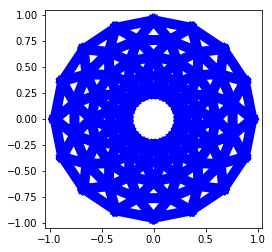

In [28]:
from matplotlib.tri import Triangulation
from matplotlib.patches import Polygon
import numpy as np


def update_polygon(tri):
    if tri == -1:
        points = [0, 0, 0]
    else:
        points = triang.triangles[tri]
    xs = triang.x[points]
    ys = triang.y[points]
    polygon.set_xy(np.column_stack([xs, ys]))


def motion_notify(event):
    if event.inaxes is None:
        tri = -1
    else:
        tri = trifinder(event.xdata, event.ydata)
    update_polygon(tri)
    plt.title('In triangle %i' % tri)
    event.canvas.draw()


# Create a Triangulation.
n_angles = 16
n_radii = 5
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
triang = Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# Use the triangulation's default TriFinder object.
trifinder = triang.get_trifinder()

# Setup plot and callbacks.
plt.subplot(111, aspect='equal')
plt.triplot(triang, 'bo-')
polygon = Polygon([[0, 0], [0, 0]], facecolor='y')  # dummy data for xs,ys
update_polygon(-1)
plt.gca().add_patch(polygon)
plt.gcf().canvas.mpl_connect('motion_notify_event', motion_notify)
plt.show()

##### Ellipse Rotated

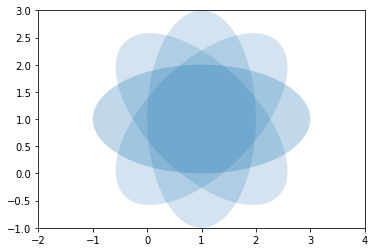

In [29]:
from matplotlib.patches import Ellipse

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()

#### 3. Image

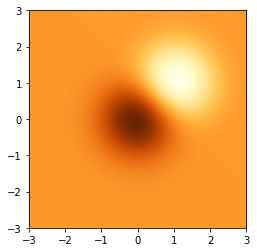

In [63]:
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.YlOrBr,
                origin='lower', extent=[-3, 3, -3, 3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

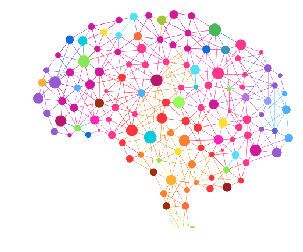

In [31]:
# A sample image
with cbook.get_sample_data('sample.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes

plt.show()


##### Interpolating images

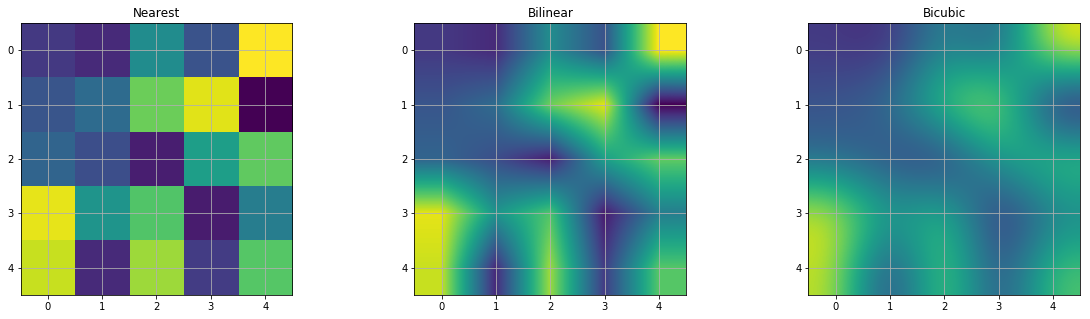

In [62]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

#### 4.Contouring and pseudocolor

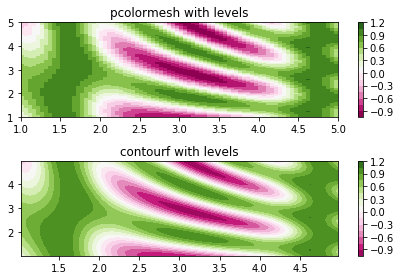

In [33]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

#### 5. Histograms

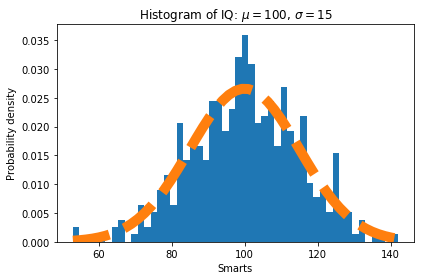

In [34]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

#### 6. Paths

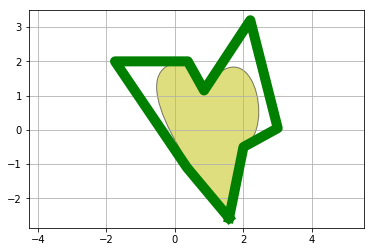

In [59]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='y', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

#### 7. Three-dimensional plotting

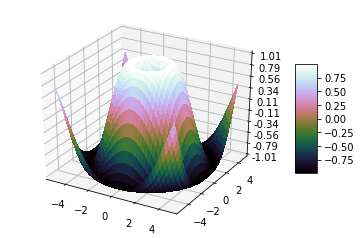

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.cubehelix,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#### 8. Streamplot

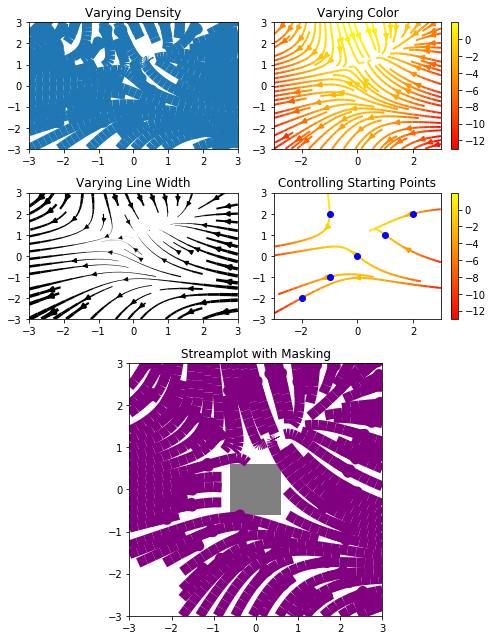

In [57]:
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.axis((-w, w, -w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='purple')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

#### 9. Ellipses

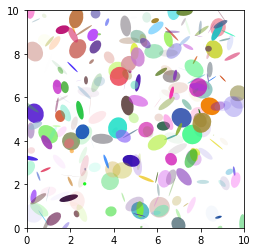

In [38]:
NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

#### 10. Bar charts

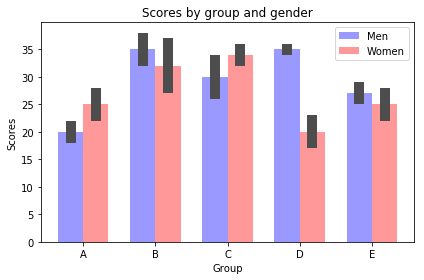

In [39]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

#### 11. Pie charts

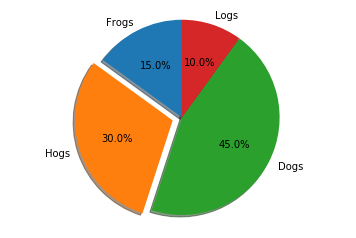

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### 12. Tables

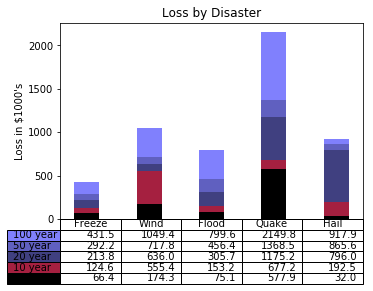

In [55]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.gist_stern(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

#### 13. Scatter plots

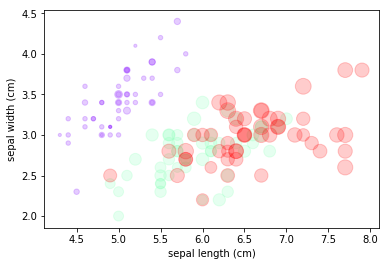

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='rainbow')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

#### 14.GUI widgets

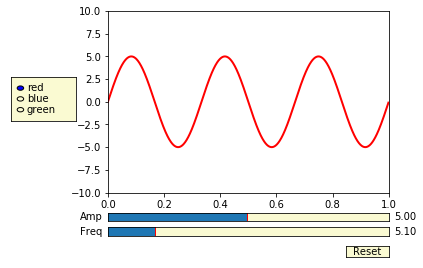

In [43]:
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

#### 15. Filled curves

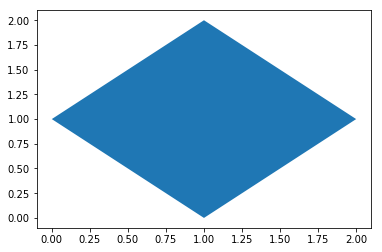

In [44]:
x = [0, 1, 2, 1]
y = [1, 2, 1, 0]

fig, ax = plt.subplots()
ax.fill(x, y)
plt.show()

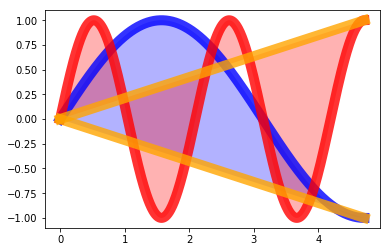

In [52]:
x = np.linspace(0, 1.5 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()

ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)

# Outline of the region we've filled in
ax.plot(x, y1, c='b', alpha=0.8)
ax.plot(x, y2, c='r', alpha=0.8)
ax.plot([x[0], x[-1]], [y1[0], y1[-1]], c='orange', alpha=0.8)
ax.plot([x[0], x[-1]], [y2[0], y2[-1]], c='orange', alpha=0.8)

plt.show()

#### 16. Log plots

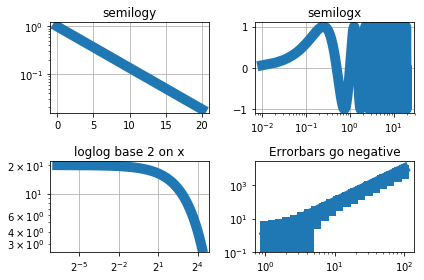

In [46]:
# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(ymin=0.1)

fig.tight_layout()
plt.show()

#### 17. Polar plots

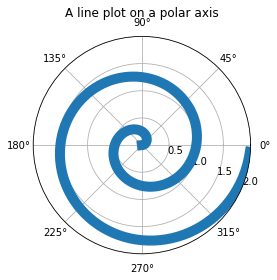

In [47]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


#### 18. Legends

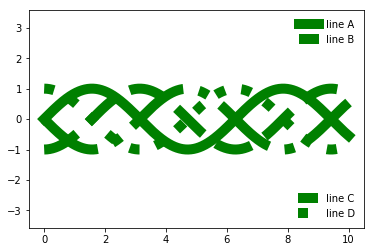

In [50]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='green')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

#### 19. TeX-notation for text objects

0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ \infty,\ \partial

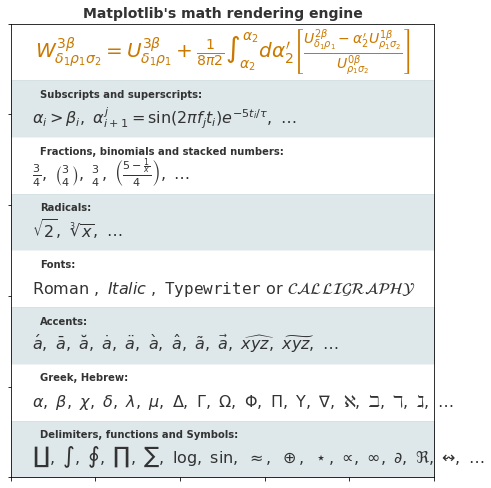

In [49]:
from __future__ import print_function
import subprocess
import sys
import re
import gc

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in mpl online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = (1. / (n_lines))

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59 * line_axesfrac),
                 xycoords='data', color=mpl_orange_rvb, ha='center',
                 fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1 - (i_line) * line_axesfrac
        baseline_next = baseline - line_axesfrac
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3 * line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75 * line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb,
                     fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()


if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    subprocess.call(["pdflatex", "mathtext_examples.ltx"])
else:
    doall()

Refernces:
    - https://www.python-course.eu/matplotlib_multiple_figures.php
    - https://matplotlib.org/